# Test for new Similarity measures

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scs
import gitInformation
from decimal import Decimal

In [2]:
gitInformation.printInformation()

Information about this notebook
Date: 2016-11-17
Python Version: 2.7.10 |Anaconda 2.3.0 (64-bit)| (default, May 28 2015, 16:44:52) [MSC v.1500 64 bit (AMD64)]
Git directory: C:\Users\Dowa\Desktop\IpythonNotebook\kt-2015-DSPHandsOn\.git
Current git SHA: 5cc21247a4ac65506a1ea80a36e51ed5dd07261a
Remotes: origin, 
Current branch: master
origin remote URL: https://github.com/dowa4213/kt-2015-DSPHandsOn.git


In [3]:
%matplotlib inline

## Generate some Data

In [4]:
time = np.linspace(0, 2, 512)
data = np.sin(np.pi*time*2)
data2 = np.cos(np.pi*time*2)

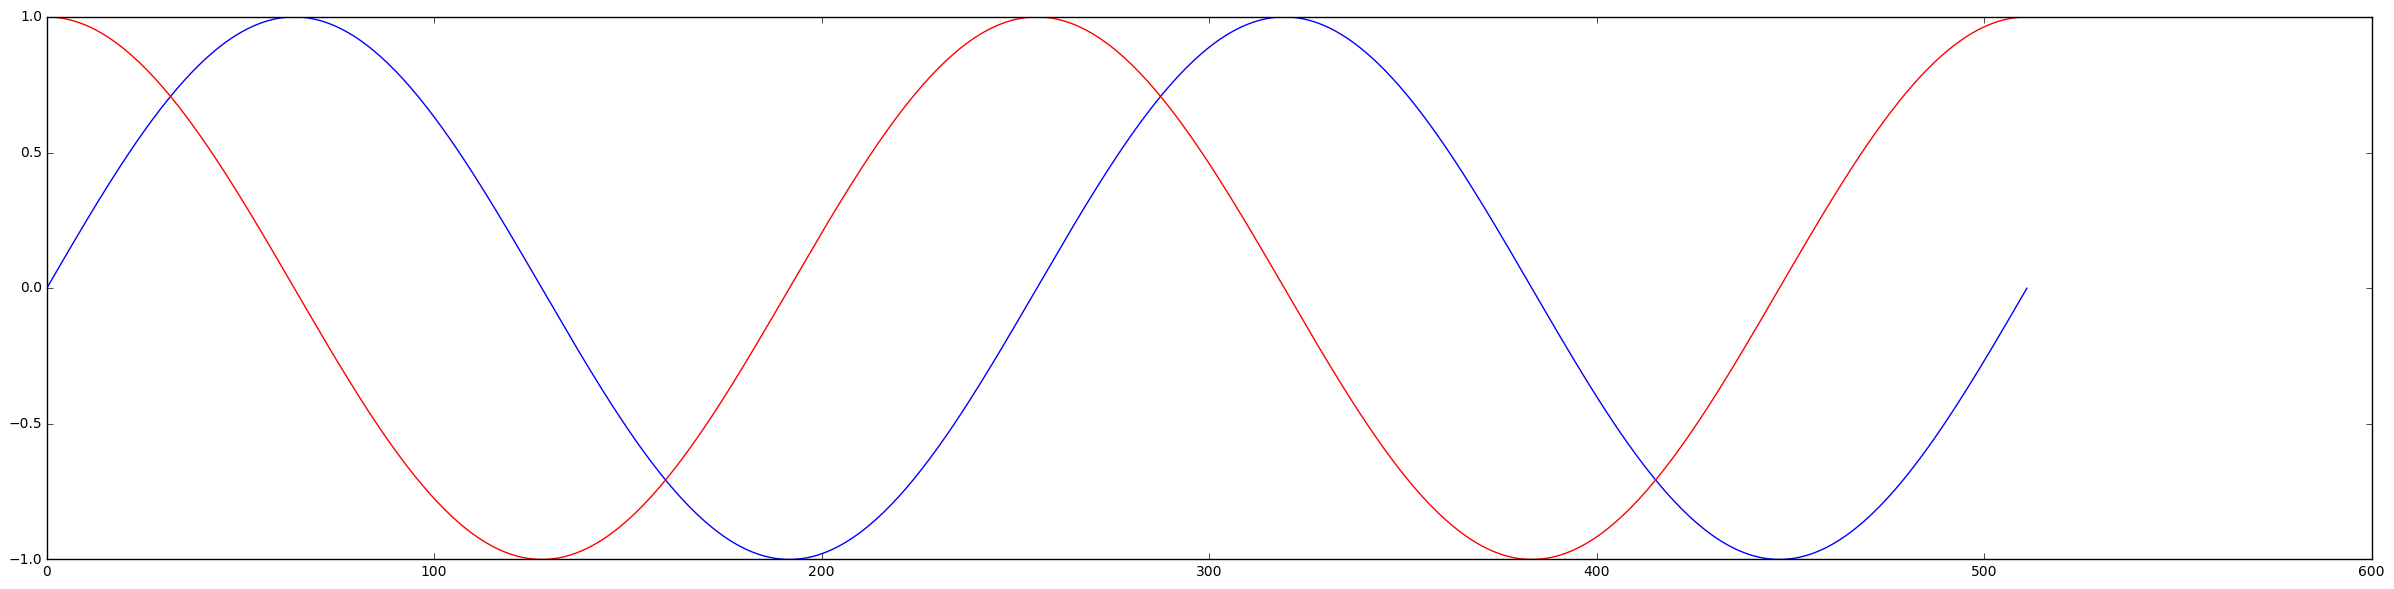

In [5]:
plt.figure(figsize=(30,7))
plt.plot(data)
plt.plot(data2, color = "red")

In [8]:
a = [0,0,0,0,1,1,1,1,1,0,0,0,0]
b = [1,1,1,1,0,0,0,0,0,1,1,1,1]

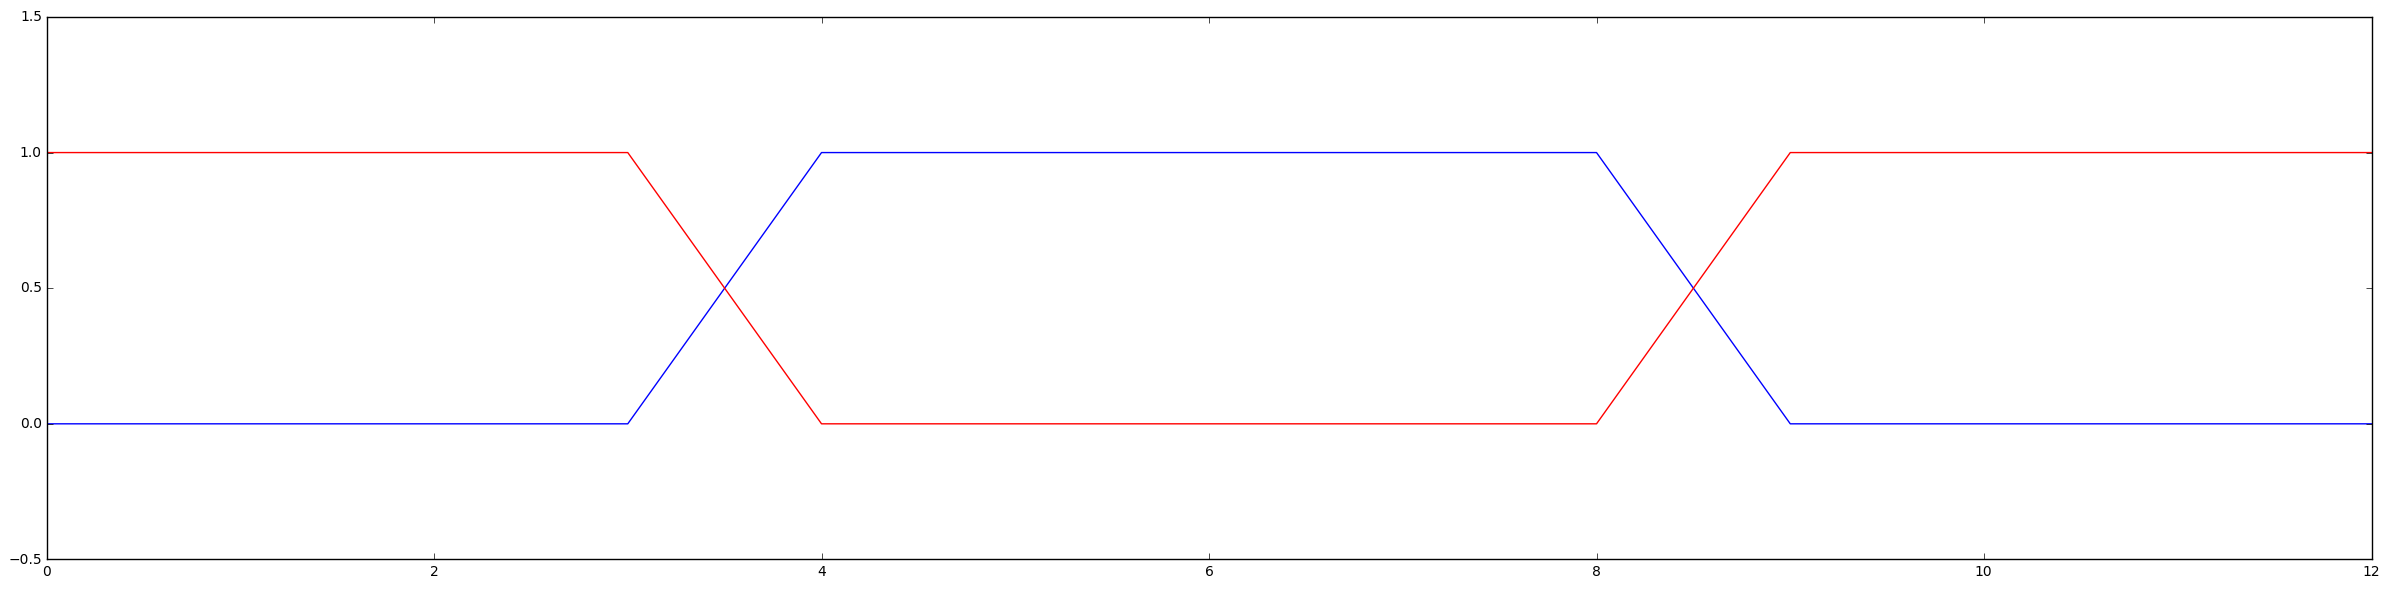

In [10]:
plt.figure(figsize=(30,7))
plt.axis([0,12,-0.5,1.5])
plt.plot(a)
plt.plot(b, color = "red")

## [Correlation Coeff](https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient)

#### Numpy Correaltion

In [12]:
cc = np.corrcoef(data,data2)
cc[1,0]

9.622349268798046e-19

In [102]:
cc2 = np.corrcoef(data,data)
cc2[1,0]

1.0

In [108]:
cc3 =np.corrcoef(a,b)
cc3[1,0]

-1.0

In [24]:
cc3 =np.corrcoef(data[0:13],a)
cc3[1,0]

0.0046385760869204857

#### Scipy Correaltion

In [105]:
ccscipy = scs.pearsonr(data,data2)
ccscipy[0]

-1.1058925356815784e-17

In [106]:
ccscipy2 = scs.pearsonr(data,data)
ccscipy2[0]

1.0

In [109]:
ccscipy2 = scs.pearsonr(a,b)
ccscipy2[0]

-1.0

## [Euclidean distance](https://en.wikipedia.org/wiki/Euclidean_distance)

In [68]:
def euclideanDistance(x,y):
    if len(x) != len((y)):
        raise ValueError("all the input array dimensions must match exactly")
    
    dist = round(np.sqrt(sum(np.power(a-b,2) for a,b in zip(x, y))),3) # Number rounded to 3 digits from the decimal point.
    return dist

In [69]:
euclideanDistance(data,data2)

22.627

In [70]:
euclideanDistance(data,data)

0.0

In [71]:
euclideanDistance(a,b)

3.606

## [Manhattan distance](https://en.wikipedia.org/wiki/Taxicab_geometry)

In [66]:
def manhattanDistance(x,y):
    if len(x) != len((y)):
        raise ValueError("all the input array dimensions must match exactly")
    
    dist = round(sum(abs(a-b)for a,b in zip(x,y)),3)
    return dist 

In [67]:
manhattanDistance(data,data2)

461.062

In [32]:
manhattanDistance(data,data)

0.0

In [33]:
manhattanDistance(a,b)

13

## [Minkowski distance](https://en.wikipedia.org/wiki/Minkowski_distance)

In [40]:
def nth_root(value, n_root):
    root_value = 1/float(n_root)
    temp = round(Decimal(value)**Decimal(root_value),3) 
    return temp

def minkowskiDistance(x, y, p_val):
    if len(x) != len((y)):
        raise ValueError("all the input array dimensions must match exactly")
        
    dist = nth_root(sum(np.power(abs(a-b),p_val)for a,b in zip(x,y)),p_val)
    return dist

In [53]:
# For p_val = 1: Minkowski distance = Manhatten distance
print "Minkowski distance for p_val = 1: " + str(minkowskiDistance(data,data2, 1))
print "Manhatten distance: " + str(round(manhattanDistance(data,data2),3))

Minkowski distance for p_val = 1: 461.062
Manhatten distance: 461.062


In [56]:
# For p_val = 2: Minkowski distance = Euclidean distance
print "Minkowski distance for p_val = 2: " + str(minkowskiDistance(data,data2, 2))
print "Euclidean distance: " + str(round(euclideanDistance(data,data2),3))

Minkowski distance for p_val = 2: 22.627
Euclidean distance: 22.627


In [65]:
# For p_val = ∞: Minkowski distance ~ Chebychev distance
print "Minkowski distance for p_val = ∞ : " + str(minkowskiDistance(data,data2, 1000))

Minkowski distance for p_val = ∞ : 1.418


## [Cosine similarity](https://en.wikipedia.org/wiki/Cosine_similarity)

In [76]:
def square_rooted(x):
    temp = round(np.sqrt(sum(a*a for a in x)),3)
    return temp

def cosineSimilarity(x,y):
    if len(x) != len((y)):
        raise ValueError("all the input array dimensions must match exactly")
        
    num = sum(a*b for a,b in zip(x,y))
    denom = square_rooted(x) *square_rooted(y)
    sim = round(num/float(denom),3)
    
    return sim

In [78]:
cosineSimilarity(data,data)

1.0

In [79]:
cosineSimilarity(data,data2)

-0.0

In [80]:
cosineSimilarity(a,b)

0.0

## [Jaccard similarity](https://en.wikipedia.org/wiki/Jaccard_index)

In [87]:
def jaccardSimilarity(x,y):   
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    sim = intersection_cardinality/float(union_cardinality)
    return sim

In [88]:
jaccardSimilarity(data,data)

1.0

In [89]:
jaccardSimilarity(data,data2)

0.0

In [90]:
jaccardSimilarity(a,b)

1.0